In [ ]:
%pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------------------------------- -------- 1.0/1.4 MB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 4.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import numpy as np

In [2]:
df = pd.read_csv("data_file.csv")
cols_to_drop = ['FileName', 'md5Hash']
df = df.drop(columns=cols_to_drop)
df.drop_duplicates(keep='last', inplace=True)
df.to_csv("df_clear.csv")

In [3]:
df = pd.read_csv("df_clear.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32256 entries, 0 to 32255
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Unnamed: 0          32256 non-null  int64
 1   Machine             32256 non-null  int64
 2   DebugSize           32256 non-null  int64
 3   DebugRVA            32256 non-null  int64
 4   MajorImageVersion   32256 non-null  int64
 5   MajorOSVersion      32256 non-null  int64
 6   ExportRVA           32256 non-null  int64
 7   ExportSize          32256 non-null  int64
 8   IatVRA              32256 non-null  int64
 9   MajorLinkerVersion  32256 non-null  int64
 10  MinorLinkerVersion  32256 non-null  int64
 11  NumberOfSections    32256 non-null  int64
 12  SizeOfStackReserve  32256 non-null  int64
 13  DllCharacteristics  32256 non-null  int64
 14  ResourceSize        32256 non-null  int64
 15  BitcoinAddresses    32256 non-null  int64
 16  Benign              32256 non-null  int6

In [4]:
X = df.iloc[:, 1:-1].values
Y = df.iloc[:, -1].values

In [37]:
X

array([[ 34404,     84, 121728, ...,  16864,   1024,      0],
       [ 34404,     84,  19904, ...,  16736,   1040,      0],
       [ 34404,     84,  97728, ...,  16736,   1096,      0],
       ...,
       [   332,      0,      0, ...,      0,   2364,      0],
       [   332,      0,      0, ...,      0, 130296,      0],
       [   332,      0,      0, ...,      0,   6912,      0]])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [6]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [9]:
history = model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=20, batch_size=32, validation_data=(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test), callbacks=[early_stopping])

Epoch 1/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8860 - loss: 0.2608 - val_accuracy: 0.9609 - val_loss: 0.1143
Epoch 2/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9554 - loss: 0.1223 - val_accuracy: 0.9619 - val_loss: 0.1027
Epoch 3/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9628 - loss: 0.1050 - val_accuracy: 0.9780 - val_loss: 0.0696
Epoch 4/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9728 - loss: 0.0786 - val_accuracy: 0.9781 - val_loss: 0.0669
Epoch 5/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9764 - loss: 0.0679 - val_accuracy: 0.9772 - val_loss: 0.0732
Epoch 6/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9765 - loss: 0.0662 - val_accuracy: 0.9786 - val_loss: 0.0683
Epoch 7/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9777 - loss: 0.0652 - val_accuracy: 0.9802 - val_loss: 0.0637
Epoch 8/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9762 - loss: 0.0659 - val_accuracy: 0.

In [10]:
accuracy = model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test, verbose=0)[1]
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98


In [11]:
y_pred = (model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1)) > 0.5).astype("int32")

202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [12]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[2104   37]
 [  97 4214]]


<Figure size 640x480 with 0 Axes>

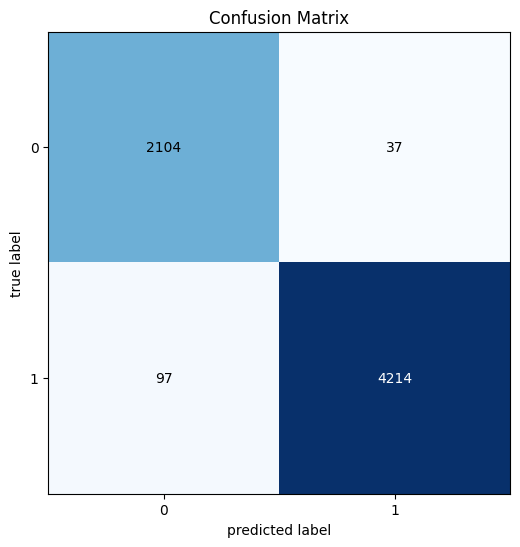

In [13]:
plt.figure()
plot_confusion_matrix(cm, figsize=(8, 6))
plt.title("Confusion Matrix")
plt.show()

In [14]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2141
           1       0.99      0.98      0.98      4311

    accuracy                           0.98      6452
   macro avg       0.97      0.98      0.98      6452
weighted avg       0.98      0.98      0.98      6452



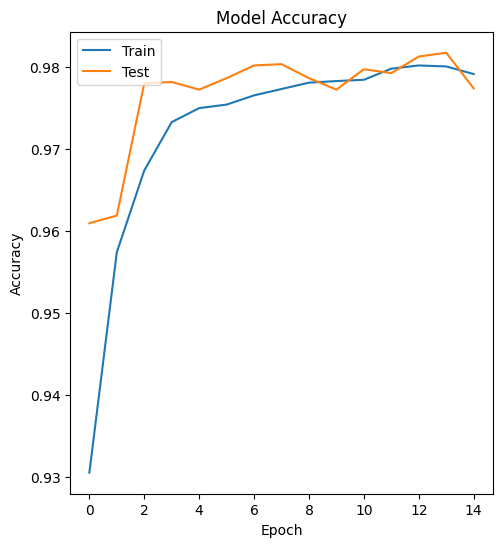

In [15]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

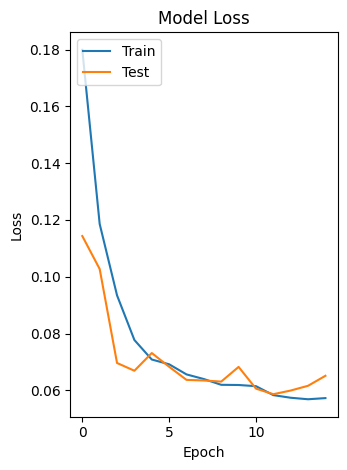

In [16]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.tight_layout()
plt.show()

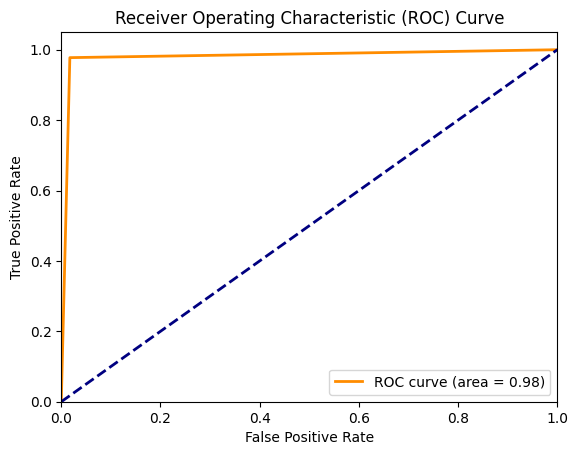

In [17]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

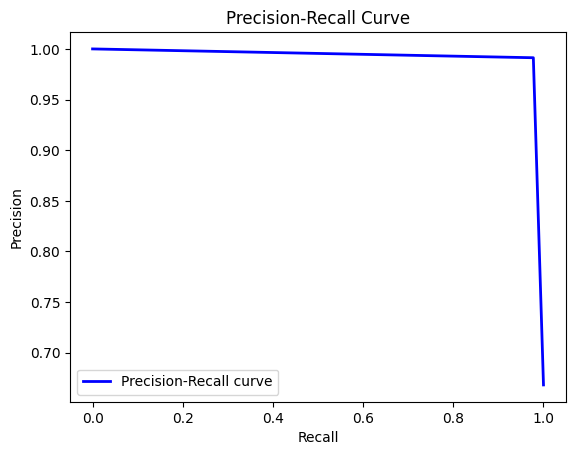

In [18]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [20]:

print("Enter the features for a test case:")
test_case = []
feature_names = df.columns[1:-1]
for feature_name in feature_names:
    value = float(input(f"Enter the value for {feature_name}: "))
    test_case.append(value)
test_case = np.array(test_case).reshape(1, -1, 1)
predicted_prob = model.predict(test_case)[0][0]
predicted_label = "Benign" if predicted_prob > 0.5 else "Malicious"
print("\nTest Case:")
print(test_case)
print("Predicted Probability:", predicted_prob)
print("Predicted Label:", predicted_label)

Enter the features for a test case:
Enter the value for Machine: 332
Enter the value for DebugSize: 0
Enter the value for DebugRVA: 0
Enter the value for MajorImageVersion: 0
Enter the value for MajorOSVersion: 4
Enter the value for ExportRVA: 0
Enter the value for ExportSize: 0
Enter the value for IatVRA: 8912
Enter the value for MajorLinkerVersion: 2
Enter the value for MinorLinkerVersion: 1
Enter the value for NumberOfSections: 66
Enter the value for SizeOfStackReserve: 34
Enter the value for DllCharacteristics: 234
Enter the value for ResourceSize: 342
Enter the value for BitcoinAddresses: 23
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step

Test Case:
[[[3.320e+02]
  [0.000e+00]
  [0.000e+00]
  [0.000e+00]
  [4.000e+00]
  [0.000e+00]
  [0.000e+00]
  [8.912e+03]
  [2.000e+00]
  [1.000e+00]
  [6.600e+01]
  [3.400e+01]
  [2.340e+02]
  [3.420e+02]
  [2.300e+01]]]
Predicted Probability: 0.056626957
Predicted Label: Malicious


In [22]:
from tensorflow import keras
from keras.models import load_model

In [24]:
model.save("lstm_model.h5")

In [26]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.6/322.6 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.0 MB/s eta 0:00:00


In [46]:
import gradio as gr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Custom CSS styling
custom_css = """
@import url('https://fonts.googleapis.com/css2?family=Roboto:wght@300;400;500;700&display=swap');

body, .gradio-container {
    font-family: 'Roboto', -apple-system, BlinkMacSystemFont, sans-serif !important;
    -webkit-font-smoothing: antialiased;
    background-color: #0D1117 !important;
    color: #E6EDF3 !important;
}

.dark .gradio-container,
.dark .gradio-container .block {
    background-color: #0D1117 !important;
    color: #E6EDF3 !important;
}

.gradio-container h1 {
    color: #58A6FF !important;
    font-size: 2rem !important;
    font-weight: 700 !important;
}

.gradio-container h2 {
    color: #58A6FF !important;
    font-size: 1.4rem !important;
    font-weight: 600 !important;
}

.gradio-container .block {
    border: 1px solid #30363D !important;
    border-radius: 12px !important;
    padding: 20px !important;
    background-color: #161B22 !important;
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2) !important;
}

.gradio-container input,
.gradio-container .gr-number input,
.gradio-container textarea {
    background-color: #21262D !important;
    color: #E6EDF3 !important;
    border: 1px solid #30363D !important;
    border-radius: 8px !important;
}

.gradio-container .gr-button {
    background-color: #238636 !important;
    color: #FFFFFF !important;
    border-radius: 8px !important;
    padding: 0.75rem 1.5rem !important;
    font-weight: 500 !important;
    transition: all 0.2s ease !important;
}

.gradio-container .gr-button:hover {
    background-color: #2EA043 !important;
    transform: translateY(-1px) !important;
}

.dark .gradio-container .gr-slider input[type="range"] {
    background: linear-gradient(to right, #F85149 0%, #F85149 30%, #F0883E 50%, #58A6FF 70%, #58A6FF 100%) !important;
    height: 8px !important;
    border-radius: 4px !important;
}

.dark .gradio-container table {
    border: 1px solid #30363D !important;
    border-radius: 8px !important;
}

.dark .gradio-container th {
    background-color: #21262D !important;
    color: #E6EDF3 !important;
    padding: 12px !important;
}

.dark .gradio-container td {
    padding: 12px !important;
    color: #C9D1D9 !important;
}

.footer {
    margin-top: 32px;
    text-align: center;
    padding: 12px;
    color: #8B949E !important;
    border-top: 1px solid #30363D;
}
"""

# Model and data loading functions
def load_model_and_data():
    """Load the LSTM model and feature data"""
    model = load_model("lstm_model.h5")
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

    df = pd.read_csv("df_clear.csv")
    df = df.loc[:, [c for c in df.columns if not c.startswith("Unnamed")]]
    feature_names = [c for c in df.columns if c != "Benign"]

    feature_ranges = {
        'Machine': (0, 50000),
        'DebugSize': (0, 1000),
        'DebugRVA': (0, 500000),
        'MajorImageVersion': (0, 20),
        'MajorOSVersion': (0, 20),
        'ExportRVA': (0, 500000),
        'ExportSize': (0, 10000),
        'IatVRA': (0, 500000),
        'MajorLinkerVersion': (0, 20),
        'MinorLinkerVersion': (0, 20),
        'NumberOfSections': (0, 10),
        'SizeOfStackReserve': (0, 2000000),
        'DllCharacteristics': (0, 70000),
        'ResourceSize': (0, 9000000),
        'BitcoinAddresses': (0, 5),
    }

    return model, feature_names, feature_ranges

# Prediction functions
def predict_malware(model, features):
    """Make a single prediction using the model"""
    x = np.array(features).reshape(1, -1, 1)
    prob = model.predict(x, verbose=0)[0][0]
    label = "Benign" if prob > 0.5 else "Malicious"
    return label, float(prob)

def parse_batch_input(batch_text, feature_count):
    """Parse comma-separated input into a list of feature arrays"""
    lines = batch_text.strip().split('\n')
    batch_features = []

    for line in lines:
        if not line.strip():
            continue
        values = [float(x.strip()) for x in line.split(',') if x.strip()]
        if len(values) == feature_count:
            batch_features.append(values)

    return batch_features

def batch_predict_malware(model, batch_features):
    """Make predictions on a batch of feature arrays"""
    results = []
    for features in batch_features:
        x = np.array(features).reshape(1, -1, 1)
        prob = model.predict(x, verbose=0)[0][0]
        label = "Benign" if prob > 0.5 else "Malicious"
        results.append((label, float(prob), features))
    return results

# Visualization functions
def create_prediction_plot(label, prob):
    """Create a visualization of the prediction results"""
    fig, ax = plt.subplots(figsize=(6, 3), facecolor="#0D1117")

    benign_color = "#58A6FF"
    malicious_color = "#F85149"

    ax.barh(["Malicious", "Benign"], [1-prob, prob],
            color=[malicious_color, benign_color],
            height=0.5,
            alpha=0.8)

    ax.set_xlim(0, 1)
    ax.set_facecolor("#0D1117")
    ax.tick_params(colors="#C9D1D9", labelsize=10)

    for i, v in enumerate([1-prob, prob]):
        percentage = f"{v:.1%}"
        ax.text(v + 0.02, i, percentage,
                color="#E6EDF3",
                fontweight="bold",
                verticalalignment="center",
                fontsize=11)

    ax.grid(axis='x', linestyle='--', alpha=0.3, color="#30363D")

    for spine in ax.spines.values():
        spine.set_color("#30363D")
        spine.set_linewidth(1.5)

    title_color = benign_color if label == "Benign" else malicious_color
    ax.set_title(f"Prediction: {label}",
                color=title_color,
                fontweight="bold",
                fontsize=14,
                pad=10)

    plt.tight_layout()
    return fig

def create_batch_results_table(batch_results, feature_names):
    """Create a pandas DataFrame from batch prediction results"""
    data = []
    for label, prob, features in batch_results:
        row = {f_name: f_val for f_name, f_val in zip(feature_names, features)}
        row["Prediction"] = label
        row["Confidence"] = f"{prob:.2f}"
        data.append(row)
    return pd.DataFrame(data)

def create_feature_importance_plot(features, feature_names, prob):
    """Create a plot showing relative importance of features"""
    fig, ax = plt.subplots(figsize=(8, 4), facecolor="#0D1117")

    features_array = np.array(features)
    sorted_indices = np.argsort(np.abs(features_array))

    if len(sorted_indices) > 10:
        sorted_indices = sorted_indices[-10:]

    sorted_features = features_array[sorted_indices]
    sorted_names = [feature_names[i] for i in sorted_indices]

    colors = ["#58A6FF" if x >= 0 else "#F85149" for x in sorted_features]

    ax.barh(sorted_names, np.abs(sorted_features), color=colors, alpha=0.8)

    ax.set_facecolor("#0D1117")
    ax.tick_params(colors="#C9D1D9")
    ax.set_title("Feature Magnitudes", color="#E6EDF3", fontweight="bold")

    ax.grid(axis='x', linestyle='--', alpha=0.3, color="#30363D")

    for spine in ax.spines.values():
        spine.set_color("#30363D")

    plt.tight_layout()
    return fig

# Load model and data
model, feature_names, feature_ranges = load_model_and_data()

# Create the Gradio interface
with gr.Blocks(css=custom_css, theme=gr.themes.Base()) as app:
    gr.Markdown(
        """
        <h1>🛡️ Advanced Malware Detection System</h1>
        <p>This system uses machine learning to detect malicious software based on binary features.
        Enter feature values below or use the batch input option for multiple predictions.</p>
        """
    )

    with gr.Tabs() as tabs:
        with gr.TabItem("🔍 Single Analysis", id="single_tab"):
            with gr.Row():
                with gr.Column(scale=1):
                    gr.Markdown("## 🎛️ Feature Inputs")

                    inputs = []
                    for feat in feature_names:
                        lo, hi = feature_ranges.get(feat, (0, 1_000_000))
                        input_field = gr.Number(
                            label=feat,
                            value=lo,
                            precision=0,
                            minimum=lo,
                            maximum=hi,
                            interactive=True
                        )
                        inputs.append(input_field)

                    predict_btn = gr.Button("🚀 Analyze Sample", variant="primary")

                with gr.Column(scale=2):
                    gr.Markdown("## 🎯 Analysis Results")

                    with gr.Row():
                        output_label = gr.Label(label="Classification Result")
                        output_confidence = gr.Slider(
                            label="Confidence Score",
                            minimum=0,
                            maximum=1,
                            step=0.01,
                            interactive=False,
                            elem_id="confidence_slider"
                        )

                    output_plot = gr.Plot(label="Prediction Visualization")
                    feature_plot = gr.Plot(label="Feature Importance", visible=True)

        with gr.TabItem("📊 Batch Analysis", id="batch_tab"):
            with gr.Row():
                with gr.Column(scale=1):
                    gr.Markdown("## 📝 Batch Input")
                    gr.Markdown("""
                    Enter one sample per line with comma-separated values.
                    Each line should contain values for all features in this order:
                    ```
                    Machine, DebugSize, DebugRVA, ...
                    ```
                    """)

                    batch_input = gr.TextArea(
                        label="Comma-Separated Values (one sample per line)",
                        placeholder=f"Example:\n0,0,0,0,0,0,0,0,0,0,0,0,0,0,0\n1000,500,300,5,5,1000,500,1000,5,5,3,10000,5000,5000,0",
                        lines=10
                    )

                    batch_predict_btn = gr.Button("📈 Analyze Batch", variant="primary")

                with gr.Column(scale=2):
                    gr.Markdown("## 📋 Batch Results")
                    batch_results_table = gr.Dataframe(
                        headers=["Sample", "Prediction", "Confidence"],
                        label="Batch Analysis Results"
                    )

    gr.Markdown(
        """
        <div class="footer">
        <p>© 2025 Advanced Malware Detection System | Powered by TensorFlow & Gradio</p>
        </div>
        """
    )

    def make_prediction(*feature_values):
        """Handle single sample prediction and visualization"""
        label, prob = predict_malware(model, feature_values)
        prediction_fig = create_prediction_plot(label, prob)
        importance_fig = create_feature_importance_plot(feature_values, feature_names, prob)

        return {
            output_label: {label: prob},
            output_confidence: prob,
            output_plot: prediction_fig,
            feature_plot: importance_fig
        }

    def handle_batch_prediction(batch_text):
        """Handle batch prediction from text input"""
        try:
            feature_arrays = parse_batch_input(batch_text, len(feature_names))

            if not feature_arrays:
                return gr.Dataframe(value=pd.DataFrame({"Error": ["No valid input detected"]}))

            batch_results = batch_predict_malware(model, feature_arrays)
            results_df = create_batch_results_table(batch_results, feature_names)

            return results_df

        except Exception as e:
            error_df = pd.DataFrame({"Error": [f"Error processing batch input: {str(e)}"]})
            return error_df

    predict_btn.click(
        fn=make_prediction,
        inputs=inputs,
        outputs=[output_label, output_confidence, output_plot, feature_plot]
    )

    batch_predict_btn.click(
        fn=handle_batch_prediction,
        inputs=[batch_input],
        outputs=[batch_results_table]
    )

if __name__ == "__main__":
    app.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2926a2ec4e74ea0726.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [43]:
import gradio as gr

print(gr.__version__)

5.27.0
